### Import Library

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

### Config

In [2]:
# mengatur beberapa konfigurasi
maxlen = 100 # jumlah kata maksimal atau panjang dari kalimat
vocab_size = 300# jumlah kata yang akan dijadikan vocab (kata yang sering muncul)
embedding_dim = 50 # dimensi dari embedding (menangkap similarity antar kata)

### Load Dataset

In [3]:
data = pd.read_csv("Tweets Data_STY_label_blnc.csv")

In [4]:
data.head()

,text,labels
0,sty out saya setuju usulan ini saya rinci alas...,neutral
1,dipecat pssi sty join psht,negative
2,dari kasus sty kita belajar mau serajin apapun...,negative
3,sty tidak dipecat blio hanya dirotasi menjadi ...,neutral
4,liat noh sty di tempat kerjanya udah dianggep ...,negative


### Preprocess Dataset

SPLITTING DATA

In [5]:
# splitting data menjadi training dan validation
# dilakukan sebelum preprocessing lebih lanjut untuk menghindari data leakage

X = data['text']
y = data['labels']

# splitting dengan proporsi 80:20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
# mengecek ukuran dari tiap data
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3341,)
(836,)
(3341,)
(836,)


ENCODING LABELS

In [7]:
# karena label berupa string, maka perlu diubah menjadi angka
encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)


In [8]:
# ubah menjadi one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)

TOKENISASI

In [9]:
# tokenizer akan mengubah kalimat menjadi angka
# num_words = jumlah kata yang akan dijadikan vocab
# oov_token = token untuk kata yang tidak ada di vocab
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')

In [10]:
# pastikan semua elemen dalam list adalah string
X_train = [str(i) for i in X_train]
X_val = [str(i) for i in X_val]

In [11]:
# tokenisasi pada data train
tokenizer.fit_on_texts(X_train)

# tokenisasi pada data val
tokenizer.fit_on_texts(X_val)

In [12]:
word_index = tokenizer.word_index
print("Indeks kata:", word_index)
print("Jumlah vocab:", len(word_index))

Indeks kata: {'<OOV>': 1, 'pssi': 2, 'dan': 3, 'yang': 4, 'indonesia': 5, 'shin': 6, 'timnas': 7, 'sty': 8, 'di': 9, 'ini': 10, 'taeyong': 11, 'pelatih': 12, 'dari': 13, 'erick': 14, 'thohir': 15, 'yg': 16, 'coach': 17, 'untuk': 18, 'kita': 19, 'ke': 20, 'bisa': 21, 'pemain': 22, 'itu': 23, 'jadi': 24, 'piala': 25, 'dengan': 26, 'tapi': 27, 'ada': 28, 'saya': 29, 'akan': 30, 'sama': 31, 'dunia': 32, 'juga': 33, 'tidak': 34, 'the': 35, 'bukan': 36, 'karena': 37, 'lebih': 38, 'bola': 39, 'ga': 40, 'amp': 41, 'dia': 42, 'pak': 43, 'aja': 44, 'pernah': 45, 'ketua': 46, 'mau': 47, 'udah': 48, 'ketum': 49, 'gak': 50, 'baru': 51, 'sebagai': 52, 'resmi': 53, 'pada': 54, 'et': 55, 'lagi': 56, 'sudah': 57, 'banyak': 58, 'kalian': 59, 'lolos': 60, 'masih': 61, 'kluivert': 62, 'ya': 63, 'keputusan': 64, 'orang': 65, 'kalo': 66, 'mereka': 67, 'kalau': 68, 'buat': 69, 'a': 70, 'menjadi': 71, 'apa': 72, 'sekarang': 73, 'tim': 74, 'dalam': 75, 'terima': 76, 'semua': 77, 'sepakbola': 78, 'umum': 79, 'k

In [13]:
# ubah teks menjadi sequence
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

PADDING

In [14]:
# padding agar sequence memiliki panjang yang sama
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

### Build Network

In [15]:
# membangun model
model = Sequential()
model.add(Embedding(input_dim=vocab_size + 1, output_dim=embedding_dim, input_length=maxlen))
model.build(input_shape=(None, maxlen))
model.add(LSTM(128, return_sequences =False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 50)        │        15,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,085 (418.30 KB)

 Trainable params: 107,085 (418.30 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train Network

In [18]:
# train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.4133 - loss: 1.0763 - val_accuracy: 0.6818 - val_loss: 0.8470
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.7123 - loss: 0.7301 - val_accuracy: 0.7727 - val_loss: 0.5590
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.8096 - loss: 0.4940 - val_accuracy: 0.8158 - val_loss: 0.4539
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8474 - loss: 0.4102 - val_accuracy: 0.8589 - val_loss: 0.3954
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8513 - loss: 0.3788 - val_accuracy: 0.8624 - val_loss: 0.3648
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8771 - loss: 0.3201 - val_accuracy: 0.8648 - val_loss: 0.3822
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8970 - loss: 0.2795 - val_accuracy: 0.8792 - val_loss: 0.3708
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8986 - loss: 0.2633 - val_a

### Visualize accuracy and loss

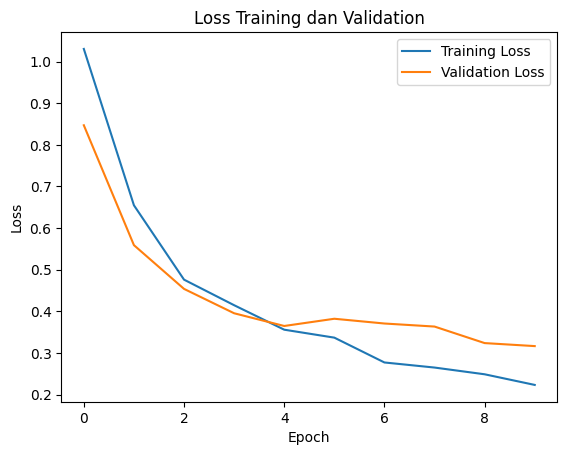

In [21]:
# plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Training dan Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

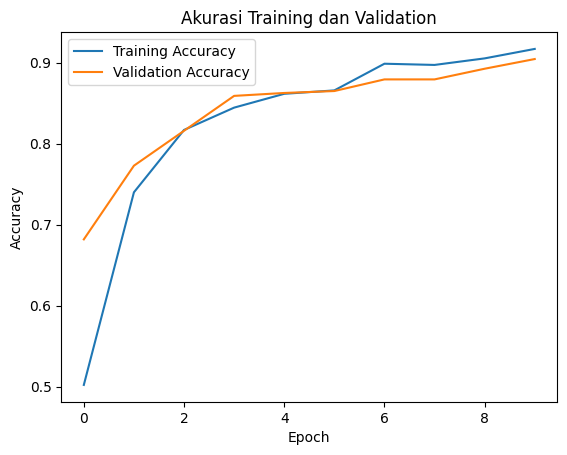

In [20]:
# plot akurasi
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Akurasi Training dan Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### Save model

In [22]:
# save model
model.save('SA_LSTM.h5')